#Import TensorFlow and other libraries

In [44]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Loading the Saved Model

In [49]:


model =VGG16(input_shape=(224,224,3),include_top=False,
                                               weights='imagenet')


regularizer = tf.keras.regularizers.l2(0.01)

for layer in model.layers:
    for attr in ['kernel_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)





for layer in model.layers[:11]:
  layer.trainable=False


Model = Sequential()
for layer in model.layers[:11]:
  layer.trainable=True
  Model.add(layer)
c=0  
for layer in model.layers[11:]:
  Model.add(layer)
  c+=1
  if c%4==0:
    Model.add(Dropout(0.3)) 

Model.add(GlobalAveragePooling2D())
Model.add(Dense(units=4098,activation="relu"))
Model.add(Dense(units=4098,activation="relu"))
Model.add(Dense(units=3, activation="softmax"))

Model.summary()
Model.load_weights('/content/drive/My Drive/Traffic_Densen(VGG).h5') # Set weight path


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [56]:
Classes={0:'Heavy Traffic', 1:'Light Traffic', 2:'Moderate Traffic'}

#Predict the Model

Moderate Traffic


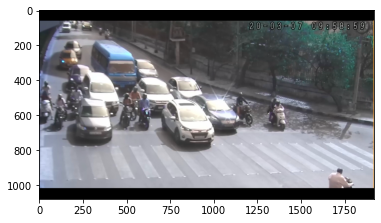

In [57]:

test_dir='/content/drive/My Drive/new_dataset/test/moderate/frame42768.jpg' #Set the path to check the prediction

img_array = cv2.imread(test_dir) 

plt.imshow(img_array)
new_array = cv2.resize(img_array, (224, 224))  
new_array=new_array.reshape(-1,224,224,3)
predictions = Model.predict(new_array)
test_pred = [np.argmax(probas) for probas in predictions]
print(Classes[test_pred[0]])
plt.show() 